In [63]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv('WTI_price.csv')

In [65]:
df.head()

,Date,Price
0,2-Jan-86,25.56
1,3-Jan-86,26.00
2,6-Jan-86,26.53
3,7-Jan-86,25.85
4,8-Jan-86,25.87


In [66]:
# A variable for predicting 'n' days out into the future
forecast_out = 472 

In [67]:
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Price']].shift(-forecast_out)

In [68]:
df.tail()

,Date,Price,Prediction
8472,13-Aug-19,57.05,NaN
8473,14-Aug-19,55.16,NaN
8474,15-Aug-19,54.51,NaN
8475,16-Aug-19,54.83,NaN
8476,19-Aug-19,56.24,NaN


In [71]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1).drop(['Date'],1))

In [72]:
#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[25.56]
 [26.  ]
 [26.53]
 ...
 [51.85]
 [51.59]
 [52.14]]


In [73]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])

In [74]:
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[18.89 18.69 18.28 ... 54.51 54.83 56.24]


In [75]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [77]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svr/svm confidence: ", svm_confidence)

svr/svm confidence:  0.7565939201594104


In [78]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.5868904773340738


In [80]:
# Set x_forecast equal to the last 30 rows of the original data set from Price column
x_forecast = np.array(df.drop(['Prediction'],1).drop(['Date'],1))[-forecast_out:]
print(x_forecast)

[[51.62]
 [51.67]
 [50.59]
 [50.44]
 [50.  ]
 [50.79]
 [49.34]
 [49.58]
 [50.93]
 [51.3 ]
 [50.61]
 [51.43]
 [51.86]
 [51.87]
 [52.05]
 [51.29]
 [51.63]
 [51.91]
 [52.32]
 [51.97]
 [52.41]
 [53.92]
 [54.11]
 [54.36]
 [54.32]
 [54.55]
 [55.63]
 [57.34]
 [57.19]
 [56.82]
 [57.16]
 [56.75]
 [56.77]
 [55.67]
 [55.28]
 [55.14]
 [56.21]
 [56.21]
 [56.84]
 [57.88]
 [58.94]
 [58.1 ]
 [57.96]
 [57.25]
 [57.4 ]
 [58.35]
 [57.48]
 [57.66]
 [55.79]
 [56.5 ]
 [57.15]
 [57.84]
 [57.12]
 [56.59]
 [57.  ]
 [57.29]
 [57.17]
 [57.49]
 [58.09]
 [58.34]
 [58.25]
 [59.55]
 [59.67]
 [59.84]
 [60.46]
 [60.37]
 [61.61]
 [61.98]
 [61.49]
 [61.73]
 [62.92]
 [63.6 ]
 [63.81]
 [64.22]
 [63.82]
 [63.92]
 [63.96]
 [63.38]
 [63.66]
 [64.45]
 [65.69]
 [65.62]
 [66.27]
 [65.71]
 [64.64]
 [64.82]
 [65.92]
 [65.5 ]
 [64.18]
 [63.48]
 [61.91]
 [61.3 ]
 [59.2 ]
 [59.41]
 [59.33]
 [60.7 ]
 [61.48]
 [61.89]
 [61.91]
 [61.73]
 [62.72]
 [63.52]
 [63.81]
 [62.94]
 [61.43]
 [60.98]
 [61.19]
 [62.49]
 [62.54]
 [61.09]
 [60.13]
 

In [81]:
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[ 58.25381263  58.00375707  61.30389018  61.41895268  61.52915362
  61.04477609  61.6595899   61.57971988  60.77566302  59.66436088
  61.28387625  59.13604536  57.00817608  56.95446369  55.98477937
  59.70216416  58.20431451  56.73900382  54.61247166  56.41501405
  54.20642445  55.26607297  56.20749121  57.40494958  57.22224407
  58.19916219  59.78887677  65.19174597  64.26626226  62.18661337
  64.08397508  61.85157606  61.94491709  59.78977975  59.72656024
  59.61869925  60.14613932  60.14613932  62.28650834  68.27236002
  70.21644629  69.19701366  68.63845737  64.63446341  65.56336918
  69.91047212  66.05460289  67.11727823  59.8010774   60.8614141
  64.02354739  68.07757245  63.84340481  61.17874501  63.14446156
  64.88174608  64.14457666  66.11543687  69.16077167  69.8891292
  69.67001023  69.38800347  69.2152094   69.00637317  68.82342856
  68.78482736  71.17479258  72.52513561  70.78610851  71.59017441
  75.85319175  75.98380951  75.38115249  73.48382634  75.34518889
  74.9524845

In [82]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[51.98330303 52.02055859 51.21583841 51.10407172 50.77622276 51.36486067
 50.28444931 50.46327602 51.46917625 51.74486742 51.23074064 51.84173189
 52.16212974 52.16958085 52.30370088 51.73741631 51.99075414 52.1993853
 52.50488092 52.24409198 52.57194094 53.69705897 53.83863011 54.02490793
 53.99510348 54.16647908 54.97119926 56.24533955 56.13357285 55.85788168
 56.11121952 55.80572389 55.82062612 55.00100371 54.71041031 54.60609473
 55.4033638  55.4033638  55.87278391 56.64769964 57.43751759 56.81162412
 56.70730854 56.17827953 56.29004622 56.99790194 56.34965512 56.48377516
 55.09041706 55.61944607 56.1037684  56.61789519 56.08141506 55.68650609
 55.99200171 56.20808398 56.11867063 56.35710624 56.80417301 56.99045083
 56.92339081 57.89203547 57.98144883 58.10811774 58.57008674 58.50302672
 59.42696471 59.70265588 59.33755135 59.51637806 60.40306048 60.90973615
 61.06620952 61.37170515 61.07366064 61.14817176 61.17797621 60.74581167
 60.95444283 61.54308074 62.46701873 62.41486094 62.

Text(0.5, 1.0, 'SVM Forecasting')

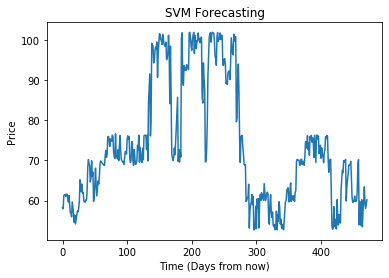

In [83]:
plt.plot(svm_prediction);
plt.ylabel('Price')
plt.xlabel('Time (Days from now)')
plt.title('SVM Forecasting')

Text(0.5, 1.0, 'LR Forecasting')

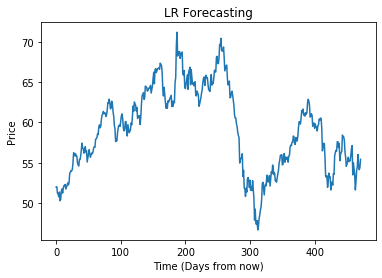

In [84]:
plt.plot(lr_prediction);
plt.ylabel('Price')
plt.xlabel('Time (Days from now)')
plt.title('LR Forecasting')

In [85]:
pd.DataFrame(svm_prediction).to_csv("svm.csv")

In [86]:
pd.DataFrame(lr_prediction).to_csv("lr.csv")

In [87]:
svm_forecast = pd.read_csv('WTI_price_svm.csv')

In [88]:
lr_forecast = pd.read_csv('WTI_price_lr.csv')

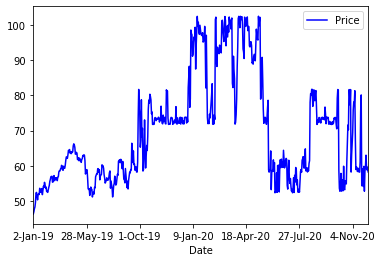

In [89]:
svm_forecast.plot(kind='line',x='Date',y='Price',color='blue');

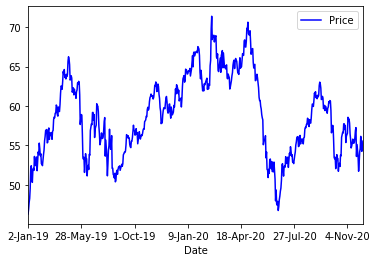

In [90]:
lr_forecast.plot(kind='line',x='Date',y='Price',color='blue');